# Lecture One
---

In this notebook we'll use a [dataset](https://www.kaggle.com/kennethjohn/housingprice) giving the living areas, number of bedrooms and price of $141$ houses from Portland, Oregon.

## Libraries

These is all libraries used in this notebook:

* [pandas](https://pandas.pydata.org/)
* [numpy](https://numpy.org/)
* [seaborn](https://seaborn.pydata.org/)

In [2]:
%matplotlib notebook

import pandas as pd
import numpy as np

# -- Plots
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Supervised Learning

In this section we'll try to explain what means **supervised learning**. Imagine that you want to predict the price of a house using only living area as variable, i.e., given a price of some house you'll tell the respective house price with some rate of confidence.

### Some notations

* $x^{(i)}$: to denote the i-th input variables, in this case, the _i-th_ area. These variables are also called input **features**.  
* $y^{(i)}$: the variable that we want to predict, i.e., output variable, also called **target**. In our case the target is the price.
* $(x^{(i)},y^{(i)})$: is the **training example**.
* ${(x^{(i)},y^{(i)}); i=1,...,m}$: the **training dataset** that we'll use to learn$^{(1)}$.
* $\mathcal{X}$: the space of input values. In this case $\mathcal{X} = \mathbb{R}$.
* $\mathcal{Y}$: the space of output values. In this case $\mathcal{Y} = \mathbb{R}$.

Thus, supervised learning consists in, given a training set, learn (find) a function $h:\mathcal{X}\mapsto \mathcal{Y}$ that $h(x)$ is a _good_ predictor for the corresponding value of $y$. The $h$ function is called **hypothesis**.

> The image illustrate the scenario where a training set _is feed_ to a learning algorithm to learn a function $h(x)$, this function try to predict the value of $y$ given $x$.

<img src="./img/1.png" width=300px>

> The image shows some _classes_ of problems separated by conditions on the target variable $y$.

<img src="./img/2.png" >

---

$^{(1)}$The concept (definition) of **learn** in _machine learning_ is much more robust, for now we'll not to abort this topic. 

---

In the next cells we'll show some visualizations of the dataset to make an idea of how the data are distributed. 

In [3]:
dataset = pd.read_csv("./datasets/ex1data2.txt")

print("Nuber of samples on dataset: ", dataset.shape[0])

dataset.head()

Nuber of samples on dataset:  47


,Area,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Plotting the feature **price** as function of **area**, i.e.:

$$\text{price}({area})$$

Giving a two dimensional space.

<IPython.core.display.Javascript object>


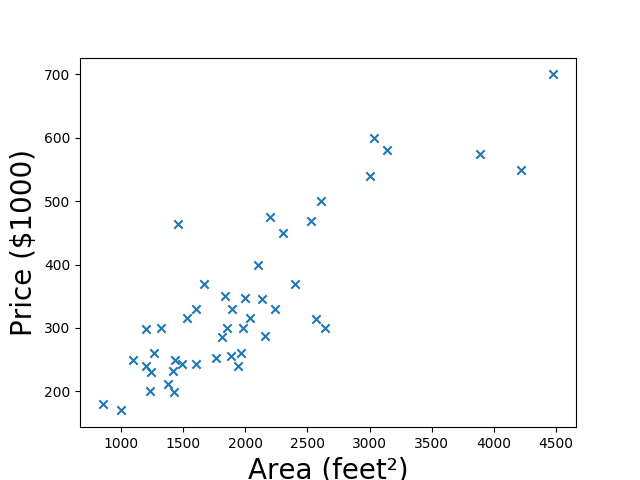

In [6]:
figure = plt.figure()
plt.xlabel("Area (feet²)", fontsize=20)
plt.ylabel("Price ($1000)", fontsize=20)
plt.scatter(dataset.values[...,0], dataset.values[...,2]/1e3, marker='x')
plt.show()

Plotting **price** as function of **area** and **number of bedrooms**, i.e.:

$$\text{price}(\text{area},\text{bedrooms})$$

Giving a three dimensional space.

<IPython.core.display.Javascript object>


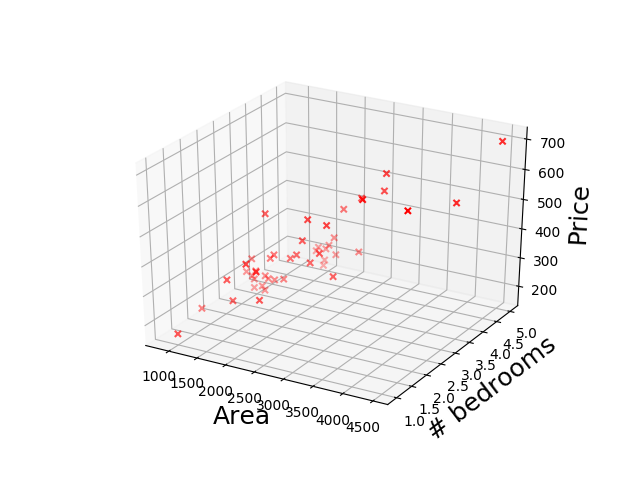

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#for zlow, zhigh in [(-50, -25), (-30, -5)]:
xs = dataset.values[...,0]
ys = dataset.values[...,1]
zs = dataset.values[...,2]/1e3
ax.scatter(xs, ys, zs, marker='x', color='r')

ax.set_xlabel('Area', fontsize=18)
ax.set_ylabel('# bedrooms', fontsize=18)
ax.set_zlabel('Price', fontsize=18)

plt.show()

In the next image, it's possible to see how our variables, features and target, are distributed in their respective histograms.

<IPython.core.display.Javascript object>


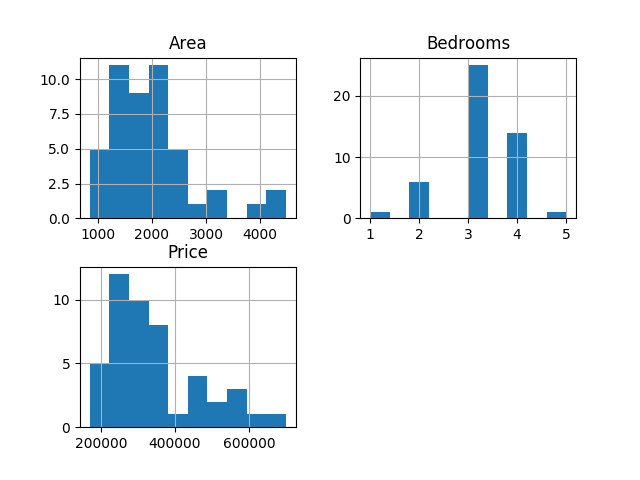

In [36]:
dataset.hist()
plt.show()

## Linear Regression

Now consider all two features: **area** and **# of bedrooms**, thus, the input space is $\mathcal{X} = \mathbb{R}^2$ and:

* $x^{i}_1$: represents the feature **area**.
* $x^{i}_2$: represents the feature **# bedrooms**.

To perform supervised learning, we're must decide how we're going represent functions/hypotheses $h$, further you'll see that is a condition of **bias-variance tradeoff** (an important concept in statistical learning theory). As an initial choice, let's say we decide to approximate $y$ as a linear function of $x$:

$$h_{\theta} = $$